### <font color='blue'> A/B testing for e-commerce troubleshooting</font>

In [77]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the Dataset

In [78]:
# Load the dataset
data = pd.read_csv('Data/dataset.csv')

In [79]:
# Shape
data.shape

(500, 5)

In [80]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_registration_time         500 non-null    float64
 1   average_number_clicks_per_session  500 non-null    float64
 2   app_logged_total_time              500 non-null    float64
 3   website_logged_total_time          500 non-null    float64
 4   total_value_spent                  500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [81]:
# Sample
data.sample(10)

,customer_registration_time,average_number_clicks_per_session,app_logged_total_time,website_logged_total_time,total_value_spent
296,3.350279,32.711119,12.326291,36.673878,482.602467
455,3.969418,33.625307,12.988221,39.672591,581.798798
322,3.086337,32.271848,13.485009,37.550880,511.979860
265,4.389455,34.814984,12.114945,36.288724,604.334840
274,4.297687,32.975182,13.909916,37.792238,630.422763
191,3.993657,32.384733,10.861604,36.584438,465.889313
434,2.399080,32.865301,12.074830,35.569170,411.186964
180,3.863425,33.547748,10.735363,37.458375,476.191413
168,4.106055,32.657269,11.957923,36.634652,516.831557
25,4.985205,34.211461,10.770249,34.649800,577.736025


## Exploratory Data Analysis

In [82]:
# columns
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

In [83]:
# Correlation (table)
data.corr()

,customer_registration_time,average_number_clicks_per_session,app_logged_total_time,website_logged_total_time,total_value_spent
customer_registration_time,1.000000,0.060247,0.029143,-0.047582,0.809084
average_number_clicks_per_session,0.060247,1.000000,-0.027826,-0.034987,0.355088
app_logged_total_time,0.029143,-0.027826,1.000000,0.082388,0.499328
website_logged_total_time,-0.047582,-0.034987,0.082388,1.000000,-0.002641
total_value_spent,0.809084,0.355088,0.499328,-0.002641,1.000000


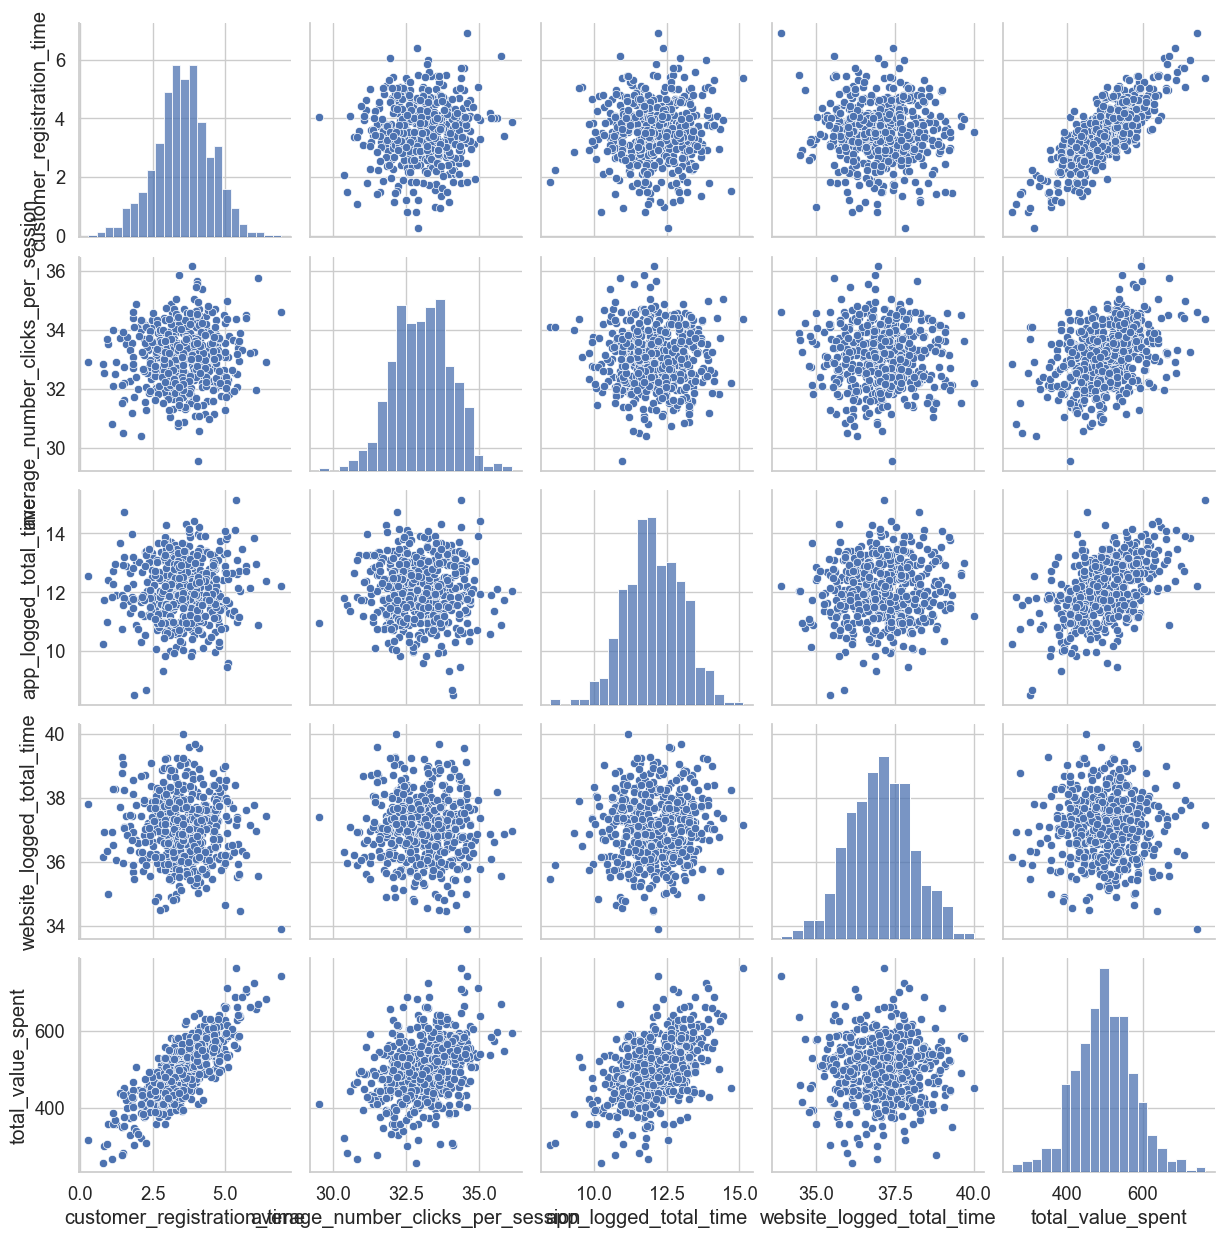

In [84]:
# Correlation (visual)
sns.pairplot(data)

### Analysis 1 - Relationship Between Time on the Website and Amount Spent

<Figure size 1800x1200 with 0 Axes>

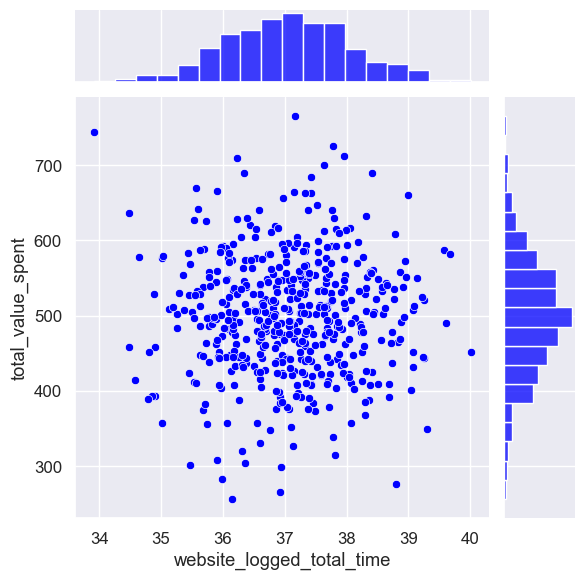

In [85]:
# Plot
plt.figure(figsize=(18,12))
sns.set(font_scale=1.1)
sns.jointplot(data = data,
             x = 'website_logged_total_time',
             y = 'total_value_spent',
             color = 'blue')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

Looking at the scatter plot, there doesn't seem to be a correlation between the two variables. Let's confirm by calculating the correlation coefficient between them.

In [86]:
# Correlation
data[['website_logged_total_time', 'total_value_spent']].corr()

,website_logged_total_time,total_value_spent
website_logged_total_time,1.000000,-0.002641
total_value_spent,-0.002641,1.000000


There does not appear to be a correlation between the time logged into the website and the amount spent by customers.

### Analysis 2 - Relationship Between Time on the App and Amount Spent

In [87]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

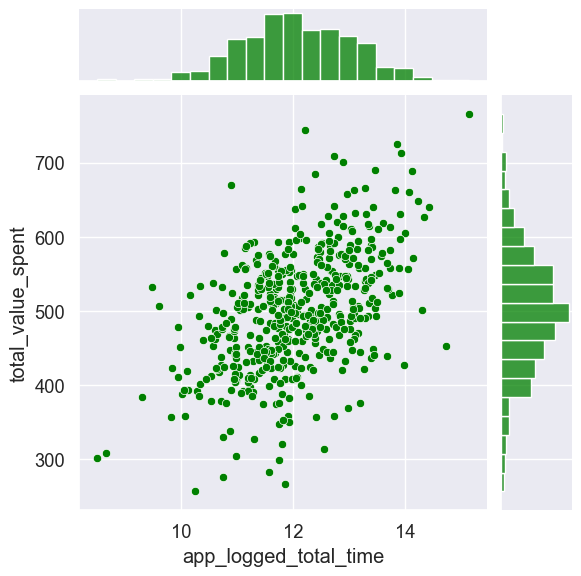

In [88]:
plt.figure(figsize=(18,12))
sns.set(font_scale=1.2)
sns.jointplot(data = data,
             x = 'app_logged_total_time',
             y = 'total_value_spent',
             color = 'green')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

Observing the scatter plot, there seems to be a positive correlation between the two variables. Let's confirm by calculating the correlation coefficient between them.

In [89]:
# Correlation
data[['app_logged_total_time', 'total_value_spent']].corr()

,app_logged_total_time,total_value_spent
app_logged_total_time,1.000000,0.499328
total_value_spent,0.499328,1.000000


The data has a moderate positive correlation. We can deduce that the total amount spent monthly tends to increase if the customer spends more time logged into the app.

### Analysis 3 - Relation Between Time on the App and Registration Time

In [90]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

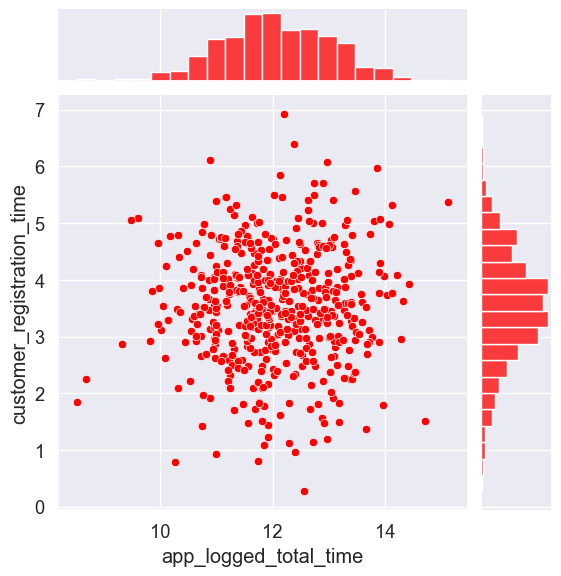

In [91]:
plt.figure(figsize = (18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data,
             x = 'app_logged_total_time',
             y = 'customer_registration_time',
             color = 'red')

Looking at the histograms, we can see that the data are normally distributed (follow a normal distribution).

From the scatterplot we can see that the data is very dense in the middle of the plot and there is no clear correlation. We can deduce that there are many customers who have been members for 3-4 years and spend approximately 11.5-12.5 minutes on the app.

In [92]:
data[['app_logged_total_time', 'customer_registration_time']].corr()

,app_logged_total_time,customer_registration_time
app_logged_total_time,1.000000,0.029143
customer_registration_time,0.029143,1.000000


### Analysis 4 - Relationship Between Registration Time and Amount Spent

In [93]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

<Figure size 1200x1800 with 0 Axes>

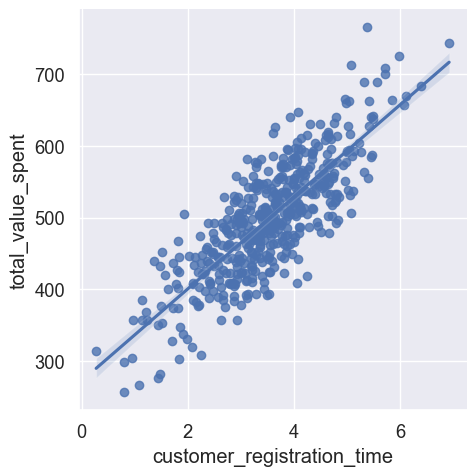

In [94]:
plt.figure(figsize = (12,18))
sns.set_style('darkgrid')
sns.lmplot(data = data,
           x = 'customer_registration_time',
           y = 'total_value_spent')

In [95]:
# Correlation
data[['customer_registration_time','total_value_spent']].corr()

,customer_registration_time,total_value_spent
customer_registration_time,1.000000,0.809084
total_value_spent,0.809084,1.000000


From the lmplot and the correlation coefficient, we can see that the registration time and the total amount spent have a strong positive correlation, that is, as the customer becomes older (more registration time), the total amount spending by customers also increases.

Another thing to note is that the shadow around the line is very thin, which means that the errors between the guess (line) and the data points are relatively small.

### Analysis 5 - Relationship Between Time Logged in the App and Time Logged in the Web Site

In [96]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

<Figure size 1800x1200 with 0 Axes>

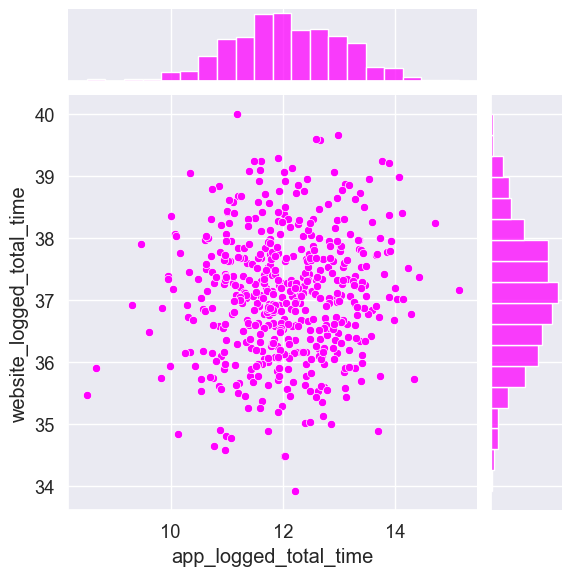

In [97]:
plt.figure(figsize=(18,12))
sns.set(font_scale = 1.2)
sns.jointplot(data = data,
          x = 'app_logged_total_time',
          y = 'website_logged_total_time',
          color = 'magenta')

In [98]:
data[['app_logged_total_time', 'website_logged_total_time']].corr()

,app_logged_total_time,website_logged_total_time
app_logged_total_time,1.000000,0.082388
website_logged_total_time,0.082388,1.000000


We have not detected any critical issues and can move on. Let's keep the predictor variable with low correlation and validate this relationship with the target variable in the final model.

## Pre-Processing Data for Building Machine Learning Models

In [99]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

In [100]:
# Input variables (predictor variables)
X = data[['customer_registration_time', 
           'average_number_clicks_per_session',
           'app_logged_total_time', 
           'website_logged_total_time']]

In [101]:
# Output variable (target variable or target)
y = data['total_value_spent']

In [102]:
# Split into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [103]:
len(X_train)

350

In [104]:
len(X_test)

150

### Standardization

In [105]:
scaler = StandardScaler()

In [106]:
scaler.fit(X_train)

StandardScaler()

In [107]:
X_train = scaler.transform(X_train)

In [108]:
X_test = scaler.transform(X_test)

In [109]:
X_train[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [110]:
X_test[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

### Construction, Training and Evaluation of Model 1 with Linear Regression (Benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [111]:
# Create the model
model_v1 = LinearRegression()

In [112]:
# Training
model_v1.fit(X_train, Y_train)

LinearRegression()

In [113]:
print('Coefficients: \n', model_v1.coef_)

Coefficients: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [114]:
# Coefficients of predictor variables
df_coef = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficients'])
df_coef

,Coefficients
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
app_logged_total_time,38.571856
website_logged_total_time,0.684737


### Model Evaluation

In [120]:
# Predictions with test data
pred_v1 = model_v1.predict(X_test)

In [121]:
# Print the first 10 predictions
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

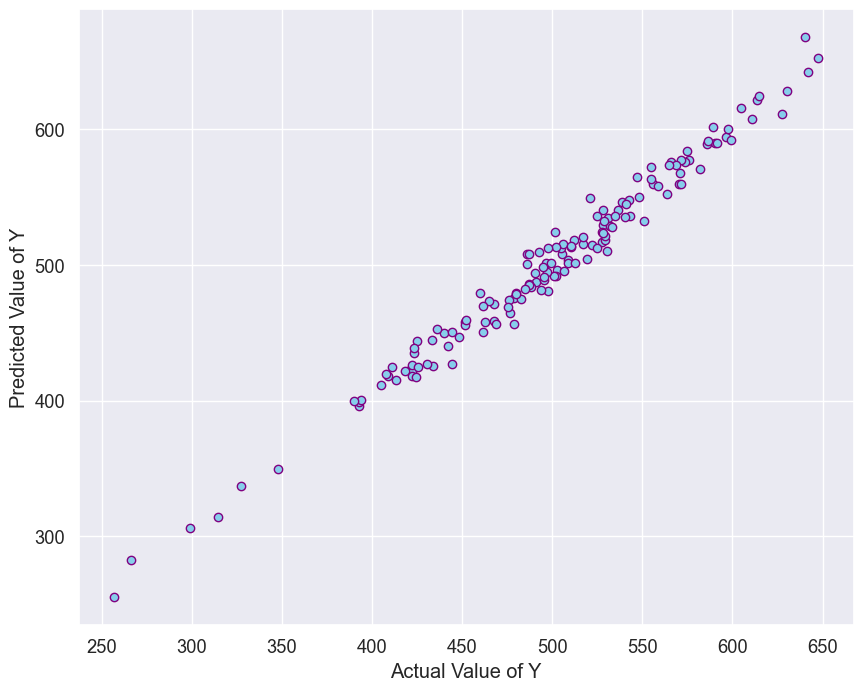

In [125]:
# Plot
plt.figure(figsize = (10, 8 ))

plt.scatter(
    x = Y_test, 
    y = pred_v1, 
    color = 'skyblue', 
    edgecolors = 'purple')

plt.xlabel('Actual Value of Y')
plt.ylabel('Predicted Value of Y');

From the scatterplot, we can see that there is a very strong correlation between the predicted y's and the actual y's in the test data. This means that we have a very good model.

### Metrics

In [127]:
data.columns

Index(['customer_registration_time', 'average_number_clicks_per_session',
       'app_logged_total_time', 'website_logged_total_time',
       'total_value_spent'],
      dtype='object')

In [130]:
# Average amount spent by customers
data['total_value_spent'].mean()

499.31403826079975

In [131]:
# Minimum value
data['total_value_spent'].min()

256.6705823

In [132]:
# Maximum value
data['total_value_spent'].max()

765.5184619

In [133]:
# MAE - Mean Absolute Error
mean_absolute_error(Y_test, pred_v1)

7.762418645778982

> MAE predicts that, on average, our model's predictions (of amounts spent) are off by approximately 7.76 reais, which is a small amount compared to the average amount spent per customer.

In [135]:
# MSE - Mean Squared Error
mean_squared_error(Y_test, pred_v1)

94.9565430843867

In [136]:
# RMSE - Square root mean square error
np.sqrt(mean_squared_error(Y_test, pred_v1))

9.74456479707466

The RMSE predicts that, on average, our model's predictions (of amounts spent) are off by approximately 9.74, which is a small amount compared to the average amount spent per customer.

In [137]:
# R2 coefficient
r2_score(Y_test, pred_v1)

0.9813622791776302

In [138]:
# Explained Variance
explained_variance_score(Y_test, pred_v1)

0.9817449183428639

Our model is able to explain 98% of the data variance, which is excellent.

The 98% R2 coefficient and the other metrics demonstrate that this is a very good model. Could we improve this performance?

### Residue

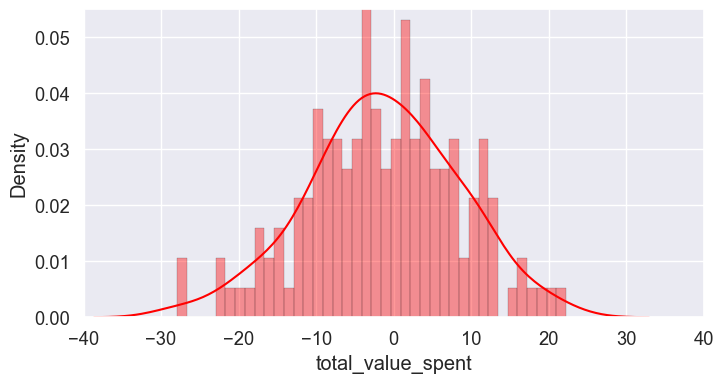

In [139]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((Y_test - pred_v1), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

The residuals are approximately normally distributed, which indicates a good fit of the model.

### Construction, Training and Evaluation of Model 2 with Ridge Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [140]:
# Create the model
## Reduce Overfitting
model_v2 = Ridge(alpha = 1.0)

In [141]:
# training
model_v2.fit(X_train, Y_train)

Ridge()

In [142]:
print('Coefficients: \n', model_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [143]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(model_v2.coef_, X.columns, columns = ['Coefficients'])
df_coef

,Coefficients
customer_registration_time,63.572460
average_number_clicks_per_session,26.171981
app_logged_total_time,38.467582
website_logged_total_time,0.680135


In [144]:
# Predictions with test data
pred_v2 = model_v2.predict(X_test)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

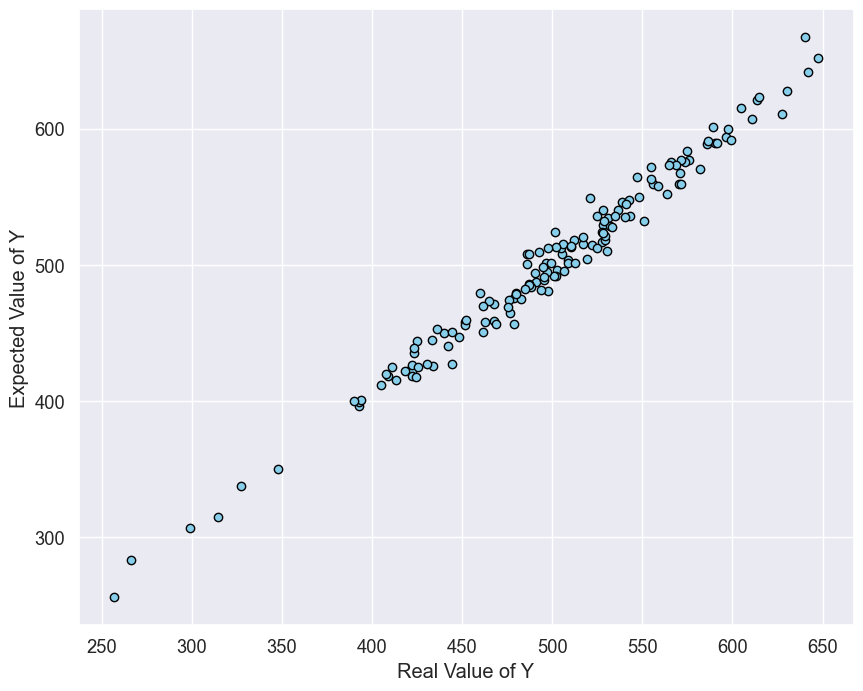

In [145]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = Y_test, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Real Value of Y')
plt.ylabel('Expected Value of Y');

In [146]:
# MAE
mean_absolute_error(Y_test, pred_v2)

7.764151148981961

In [147]:
# MSE
mean_squared_error(Y_test, pred_v2)

94.93731602493465

In [148]:
# RMSE
np.sqrt(mean_squared_error(Y_test, pred_v2))

9.7435781941202

In [149]:
# R2 coefficient
r2_score(Y_test, pred_v2)

0.981366052994101

In [150]:
# Explained Variance
explained_variance_score(Y_test, pred_v2)

0.9817472659016085

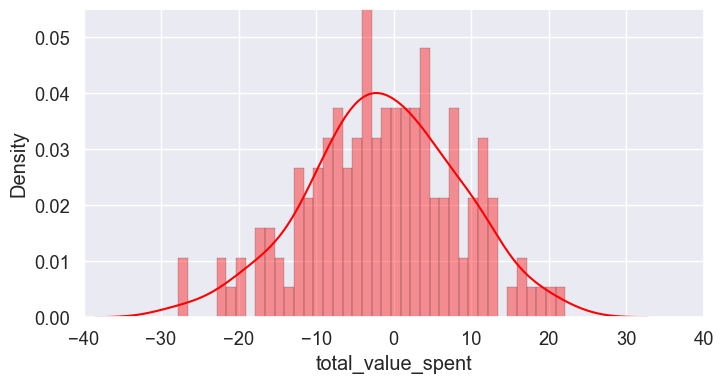

In [151]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((Y_test - pred_v2), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

### Construction, Training and Evaluation of Model 3 with LASSO Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [154]:
# Create the model
model_v3 = Lasso(alpha = 1.0)

In [155]:
# Training
model_v3.fit(X_train, Y_train)

Lasso()

In [156]:
print('Coefficients: \n', model_v3.coef_)

Coefficients: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [157]:
# Coefficients
df_coef = pd.DataFrame(model_v3.coef_, X.columns, columns = ['Coefficients'])
df_coef

,Coefficients
customer_registration_time,62.863441
average_number_clicks_per_session,25.187472
app_logged_total_time,37.621492
website_logged_total_time,0.000000


In [159]:
# Predictions with test data
pred_v3 = model_v3.predict(X_test)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

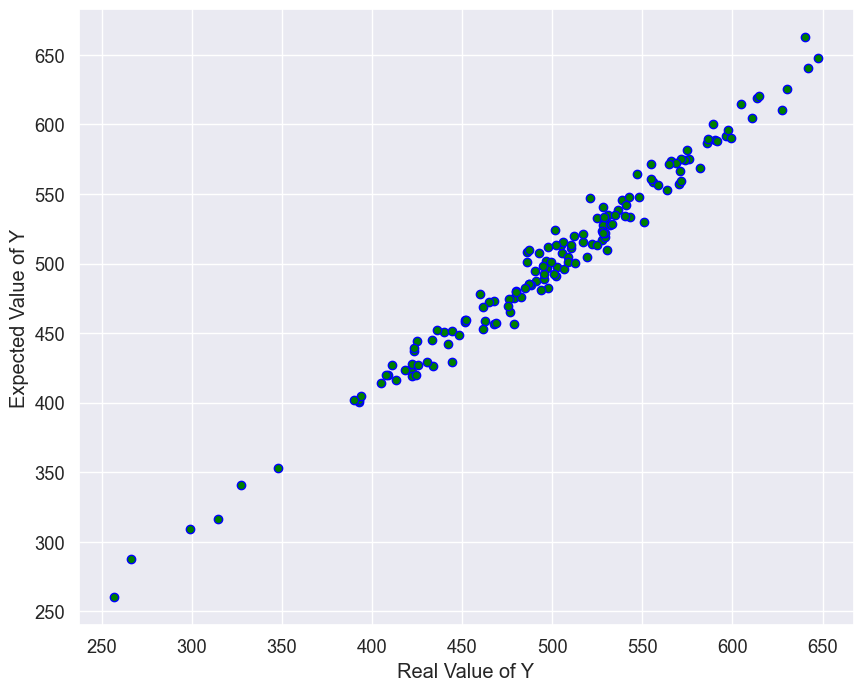

In [161]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = Y_test, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Real Value of Y')
plt.ylabel('Expected Value of Y');

In [163]:
# MAE
mean_absolute_error(Y_test, pred_v3)

7.788504696951063

In [164]:
# MSE
mean_squared_error(Y_test, pred_v3)

96.0560634897067

In [165]:
# RMSE
np.sqrt(mean_squared_error(Y_test, pred_v3))

9.800819531534426

In [166]:
# R2 coefficient
r2_score(Y_test, pred_v2)

0.981366052994101

In [167]:
# Explained Variance
explained_variance_score(Y_test, pred_v3)

0.9815600649101045

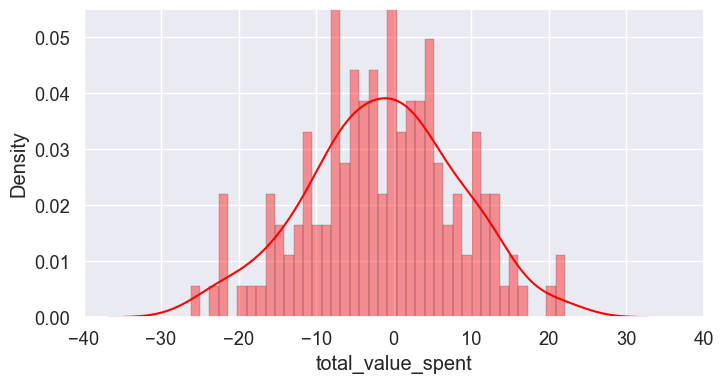

In [168]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((Y_test - pred_v3), 
                  bins = 40, 
                  color = 'red', 
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.055));

## Template Selection

Model 3 had a slightly higher error rate (RMSE) and can be discarded. Models 1 and 2 were very close and in this case we should choose the simplest model, which in our example is model 1.

## Conclusion

In [169]:
data.head()

,customer_registration_time,average_number_clicks_per_session,app_logged_total_time,website_logged_total_time,total_value_spent
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [170]:
# Coefficients
df_coef_final = pd.DataFrame(model_v1.coef_, X.columns, columns = ['Coefficients'])
df_coef_final

,Coefficients
customer_registration_time,63.742207
average_number_clicks_per_session,26.239016
app_logged_total_time,38.571856
website_logged_total_time,0.684737


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

#### Coefficient Interpretations:

* Keeping all other features fixed, an increase of 1 unit in customer registration time is associated with an increase of $63.74 in the total amount spent per customer per month.


* Keeping all other features fixed, a 1 unit increase in average clicks per session is associated with a $26.24 increase in total amount spent per customer per month.


* Keeping all other features fixed, an increase of 1 unit in total time logged into the app is associated with an increase of $38.57 in the total amount spent per customer per month.


* Keeping all other features fixed, a 1 unit increase in total time logged into the website is associated with an increase of $0.68 in the total amount spent per customer per month.

We can see that it will be more profitable for the company to invest in updating its app since the return will be higher. In addition, it is important to create policies to retain the customer for longer, as this also leads to increased sales. The app update itself will be a way to retain the customer for longer.

It does not pay, at this moment, to invest in updating the website, as the return will be minimal.

## Disclaimer: 
A good part of this project was largely done in the Data Science Academy, Big Data Real-Time Analytics with Python and Spark course (part of the Data Scientist training)

# End